# Linear Discriminant Analysis (LDA)
## Discriminant Functions

### Introduction to Discriminant Functions
The goal of LDA is to find a linear combination of features that best separates two or more classes. It assumes that the features are normally distributed and that each class has the same covariance matrix. The discriminant function helps us to classify new samples based on these assumptions.

### Estimating Priors
Let $\mathcal R$ denote a discrete random variable that assumes values in the range $\mathcal R \in \{1, 2, \ldots, R\}$, and let $\pi_r$ represent the prior probability for value $r$, namely,
$$
\pi_r = P(\mathcal R = r), \quad r = 1, 2, \ldots, R
$$

We assume we have a collection of $N$ training data points $(r_n, \mathbf{x}_n)$, where $\mathbf{x}_n \in \mathbb{R}^M$ denotes the $n$-th feature vector and $r_n$ denotes its class variable.

The prior probabilities $\pi_r$ are generally unknown and need to be estimated from the training data. This can be done using Laplace smoothing:
$$
\hat{\pi}_r = \frac{N_r + s}{N + sR}, \quad r = 1, 2, \ldots, R
$$
where $N_r$ is the number of examples that belong to class $r$ and $s > 0$ controls the amount of smoothing.

### Fitting the Gaussian Models
LDA assumes that, conditioned on the class variable $\mathcal R$, the feature data $\mathbf{x}$ is Gaussian-distributed with some positive-definite covariance matrix $\mathbf{\Sigma} > 0$ that is independent of $\mathcal R$, namely,
$$
f_{\mathbf{X}|\mathcal R}(\mathbf{x}|r) = \frac{1}{(2\pi)^{M/2} (\det(\mathbf{\Sigma}))^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_r)^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}_r) \right)
$$
where $\boldsymbol{\mu}_r$ is the mean vector for class $r$.

The parameters $\boldsymbol{\mu}_r$ and $\mathbf{\Sigma}$ are estimated from the training data using the sample averages:
$$
\hat{\boldsymbol{\mu}}_r = \frac{1}{N_r} \sum_{r_n=r} \mathbf{x}_n
$$
$$
\hat{\mathbf{\Sigma}} = \frac{1}{N - R} \sum_{r=1}^R (N_r - 1) \hat{\mathbf{\Sigma}}_r
$$
where $\hat{\mathbf{\Sigma}}_r$ is the covariance matrix for class $r$.

### Estimating the Conditional Probabilities
Using the estimated Gaussian distribution parameters, we can now estimate the desired conditional probability $P(\mathcal R = r|\mathbf{X} = \mathbf x)$. Using Bayes' rule, we have
$$
\hat{P}(\mathcal R = r|\mathbf{X} = \mathbf x) = \frac{\hat{\pi}_r \hat{f}_{\mathbf{X}|\mathcal R}(\mathbf x|r)}{\sum_{r'} \hat{\pi}_{r'} \hat{f}_{\mathbf{X}|\mathcal R}(\mathbf x|r')}
$$
The odds of a feature vector $\mathbf x$ belonging to some class $r$ over another class $r'$ is defined as the ratio:
$$
odds(\mathbf x; r, r') = \frac{\hat{P}(\mathcal R = r|\mathbf{X} = \mathbf x)}{\hat{P}(\mathcal R = r'|\mathbf{X} = \mathbf x)}
$$
Taking the natural logarithm of the odds ratio, we obtain the logit function:
$$
logit(\mathbf x; r, r') = \ln \left( \frac{\hat{P}(\mathcal R = r|\mathbf{X} = \mathbf x)}{\hat{P}(\mathcal R = r'|\mathbf{X} = \mathbf x)} \right)
$$
which simplifies to
$$
logit(\mathbf x; r, r') = \mathbf{x}^T \mathbf{w}_{rr'} - \theta_{rr'}
$$
where
$$
\mathbf{w}_{rr'} = \mathbf{\Sigma}^{-1} (\boldsymbol{\mu}_r - \boldsymbol{\mu}_{r'})
$$
and
$$
\theta_{rr'} = \frac{1}{2} (\boldsymbol{\mu}_r + \boldsymbol{\mu}_{r'})^T \mathbf{\Sigma}^{-1} (\boldsymbol{\mu}_r - \boldsymbol{\mu}_{r'}) - \ln \left( \frac{\hat{\pi}_r}{\hat{\pi}_{r'}} \right)
$$

There are two advantages for using logit representations. First, in the logarithmic scale, the odds for class $r$ over class $r'$ will always have the opposite value (i.e., reverse sign) for the odds of $r'$ over $r$. In this way, the logit value can be used to decide whether a feature vector $x$ is more likely to belong to one class or the other by examining its sign; a positive logit value corresponds to one class while a negative logit value corresponds to the other class. Moreover, and more importantly, the last line shows that the logit is affine over $\mathbf x$. This property is a consequence of the assumption of a uniform $\mathbf \Sigma$ across all labels. Motivated by these considerations and by expression, we will associate a linear discriminant function, denoted by $d_r(\mathbf x)$, with each class $r$ as follows:

## Discriminant Functions
The discriminant function for each class $r$ is defined as:
$$
d_r(\mathbf{x}) = \mathbf{x}^T \mathbf{\Sigma}^{-1} \boldsymbol{\mu}_r - \frac{1}{2} \boldsymbol{\mu}_r^T \mathbf{\Sigma}^{-1} \boldsymbol{\mu}_r + \ln \hat{\pi}_r
$$
To classify a new feature vector $\mathbf{h}$, we assign it to the class that results in the largest discriminant value:
$$
r^* = \arg\max_r d_r(\mathbf{x})
$$

## LDA for multiclass classification (under uniform variance, $\mathbf{\Sigma}$)

Given:
- $N$ training points $(\mathbf{x}_n, r_n)$ and $R$ classes
- Laplace smoothing factor $s > 0$

Compute for each class $r = 1, \ldots, R$:

1. $\hat{\pi}_r = \frac{N_r + s}{N + sR}$

2. $\hat{\boldsymbol{\mu}}_r = \frac{1}{N_r} \sum_{r_n = r} \mathbf{x}_n$

3. $\hat{\mathbf{\Sigma}}_r = \frac{1}{N_r - 1} \sum_{r_n = r} (\mathbf{x}_n - \hat{\boldsymbol{\mu}}_r)(\mathbf{x}_n - \hat{\boldsymbol{\mu}}_r)^T$

Then compute:

4. $\hat{\mathbf{\Sigma}} = \frac{1}{N - R} \sum_{r=1}^R (N_r - 1)\hat{\mathbf{\Sigma}}_r$

Classify new features $\mathbf{x}$ using:

5. $d_r(\mathbf{x}) = \mathbf{x}^T \hat{\mathbf{\Sigma}}^{-1}\hat{\boldsymbol{\mu}}_r - \frac{1}{2}\hat{\boldsymbol{\mu}}_r^T \hat{\mathbf{\Sigma}}^{-1}\hat{\boldsymbol{\mu}}_r + \ln \hat{\pi}_r, \quad r = 1, \ldots, R$

6. $r^*(\mathbf{x}) = \displaystyle{\argmax_{1 \leq r \leq R}}\; d_r(\mathbf{x})$

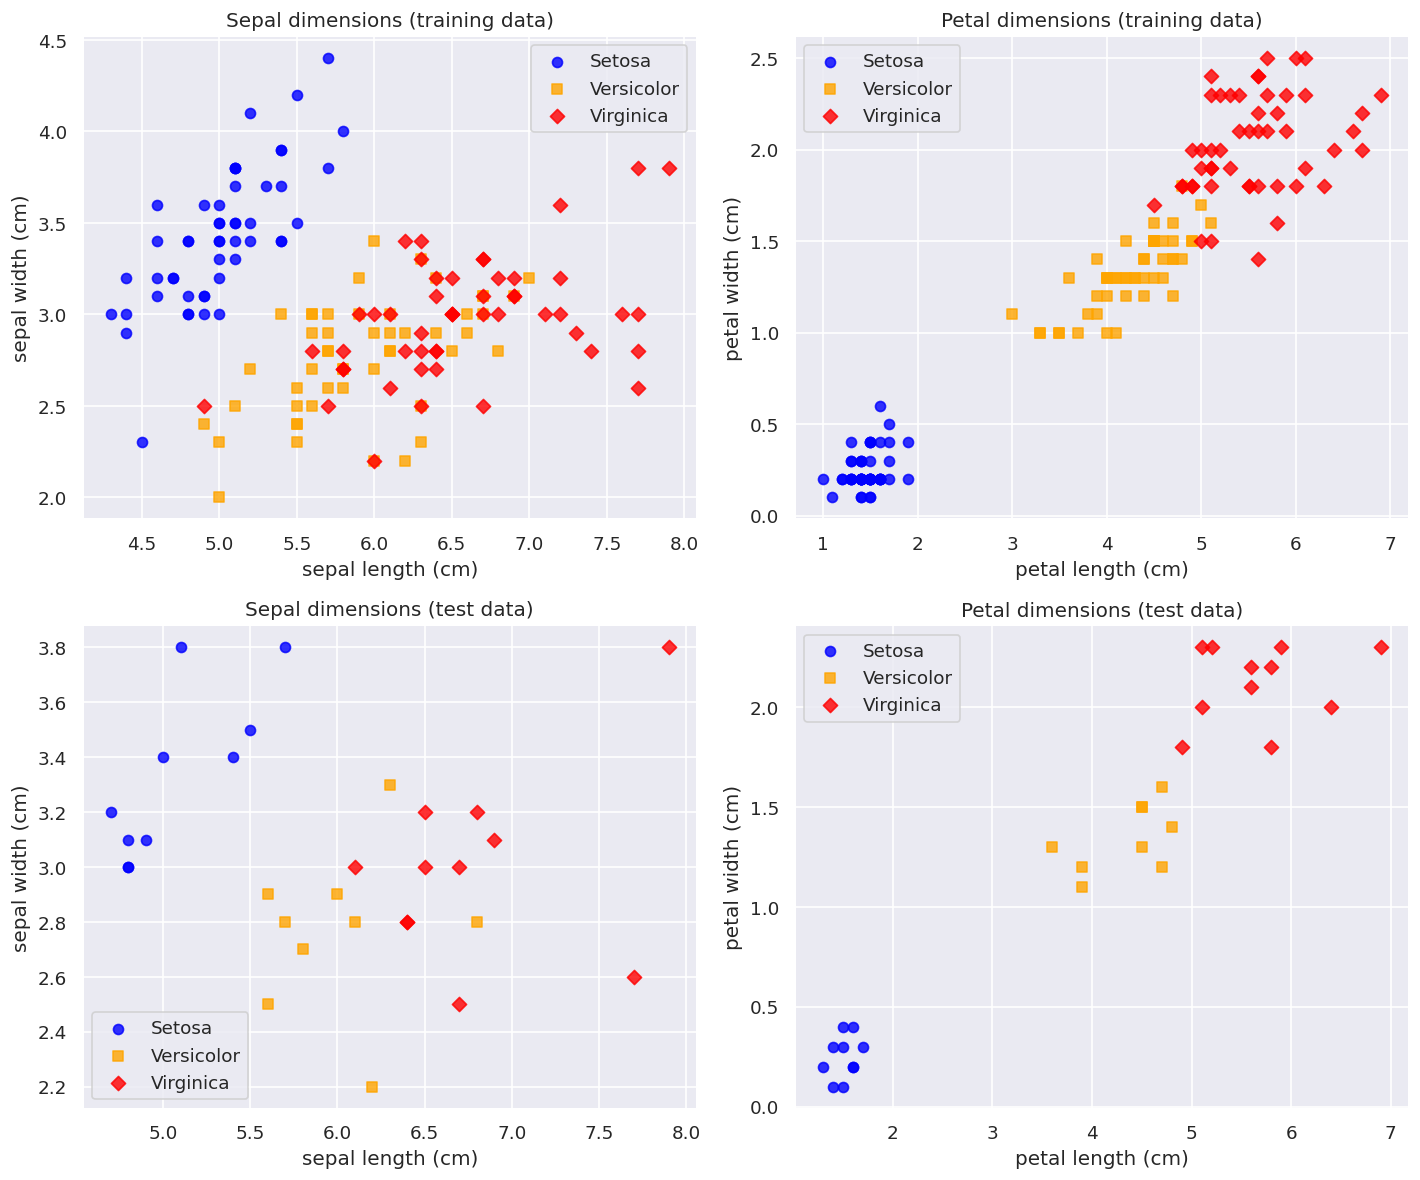

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import numpy as np

sns.set_theme()

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

# Create a color map for the scatter plot
colors = ['blue', 'orange', 'red']
markers = ['o', 's', 'D']
labels = ['Setosa', 'Versicolor', 'Virginica']

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10), dpi=120)

# First subplot: Sepal width vs Sepal length (training data)
for i, color, marker, label in zip(range(len(target_names)), colors, markers, labels):
    ax[0, 0].scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, color=color, marker=marker, label=label)
ax[0, 0].set_xlabel(feature_names[0])
ax[0, 0].set_ylabel(feature_names[1])
ax[0, 0].legend()
ax[0, 0].set_title('Sepal dimensions (training data)')

# Second subplot: Petal width vs Petal length (training data)
for i, color, marker, label in zip(range(len(target_names)), colors, markers, labels):
    ax[0, 1].scatter(X[y == i, 2], X[y == i, 3], alpha=0.8, color=color, marker=marker, label=label)
ax[0, 1].set_xlabel(feature_names[2])
ax[0, 1].set_ylabel(feature_names[3])
ax[0, 1].legend()
ax[0, 1].set_title('Petal dimensions (training data)')

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Third subplot: Sepal width vs Sepal length (test data)
for i, color, marker, label in zip(range(len(target_names)), colors, markers, labels):
    ax[1, 0].scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], alpha=0.8, color=color, marker=marker, label=label)
ax[1, 0].set_xlabel(feature_names[0])
ax[1, 0].set_ylabel(feature_names[1])
ax[1, 0].legend()
ax[1, 0].set_title('Sepal dimensions (test data)')

# Fourth subplot: Petal width vs Petal length (test data)
for i, color, marker, label in zip(range(len(target_names)), colors, markers, labels):
    ax[1, 1].scatter(X_test[y_test == i, 2], X_test[y_test == i, 3], alpha=0.8, color=color, marker=marker, label=label)
ax[1, 1].set_xlabel(feature_names[2])
ax[1, 1].set_ylabel(feature_names[3])
ax[1, 1].legend()
ax[1, 1].set_title('Petal dimensions (test data)')

plt.tight_layout()
plt.show()


In [2]:
import jax
import jax.numpy as jnp
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import check_array, check_X_y
from sklearn.utils.multiclass import unique_labels

class JAXLDA(BaseEstimator, ClassifierMixin):
    def __init__(self, smoothing=1.0):
        self.smoothing = smoothing

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        self.n_classes_ = len(self.classes_)
        self.n_features_ = X.shape[1]
        
        self.priors_ = self._estimate_priors(y)
        self.means_, self.covariance_ = self._estimate_gaussian_parameters(X, y)
        
        return self
    
    def _estimate_priors(self, y):
        priors = jnp.zeros(self.n_classes_)
        N = len(y)
        
        for idx, cls in enumerate(self.classes_):
            N_r = jnp.sum(y == cls)
            priors = priors.at[idx].set((N_r + self.smoothing) / (N + self.smoothing * self.n_classes_))
        
        return priors
    
    def _estimate_gaussian_parameters(self, X, y):
        means = jnp.zeros((self.n_classes_, self.n_features_))
        covariances = jnp.zeros((self.n_features_, self.n_features_))
        
        for idx, cls in enumerate(self.classes_):
            class_features = X[y == cls]
            means = means.at[idx].set(jnp.mean(class_features, axis=0))
            centered_features = class_features - means[idx]
            covariances += jnp.dot(centered_features.T, centered_features)
        
        covariances /= (len(X) - self.n_classes_)
        
        return means, covariances
    
    def _compute_discriminant_functions(self, X):
        inv_cov = jnp.linalg.inv(self.covariance_)
        discriminants = jnp.zeros((X.shape[0], self.n_classes_))
        
        for idx in range(self.n_classes_):
            w = jnp.dot(inv_cov, self.means_[idx])
            theta = 0.5 * jnp.dot(self.means_[idx], jnp.dot(inv_cov, self.means_[idx])) - jnp.log(self.priors_[idx])
            discriminants = discriminants.at[:, idx].set(jnp.dot(X, w) - theta)
        
        return discriminants
    
    def predict(self, X):
        X = check_array(X)
        discriminants = self._compute_discriminant_functions(X)
        return self.classes_[jnp.argmax(discriminants, axis=1)]
    
    def predict_proba(self, X):
        X = check_array(X)
        discriminants = self._compute_discriminant_functions(X)
        exp_discriminants = jnp.exp(discriminants)
        return exp_discriminants / jnp.sum(exp_discriminants, axis=1, keepdims=True)

# Example usage:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = JAXLDA(smoothing=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Predictions:", predictions)
print("Accuracy:", jnp.mean(predictions == y_test))


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 1.0


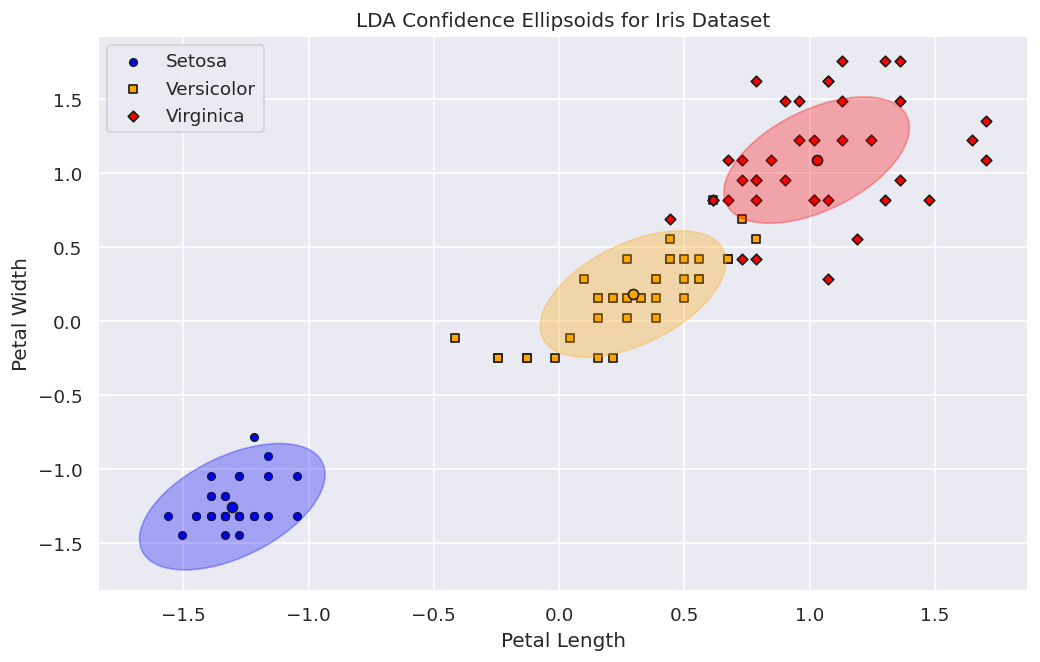

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import jax.numpy as jnp
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_array, check_X_y
from sklearn.utils.multiclass import unique_labels

# Define the JAXLDA class here...

def plot_confidence_ellipses(ax, means, covariances, colors, labels):
    for mean, cov, color, label in zip(means, covariances, colors, labels):
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
        width, height = 3 * np.sqrt(eigvals)
        ell = Ellipse(xy=mean, width=width, height=height, angle=angle, color=color, alpha=0.3)
        ax.add_patch(ell)
        ax.scatter(mean[0], mean[1], color=color, label=None, edgecolor='k')

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Use only petal length and petal width
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the JAXLDA model
model = JAXLDA(smoothing=1.0)
model.fit(X_train, y_train)

# Define the mesh grid for plotting decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict class probabilities for each point in the mesh grid
proba = model.predict_proba(jnp.c_[xx.ravel(), yy.ravel()])
Z = proba[:, 1].reshape(xx.shape)  # Use the probabilities of class 1 for color intensity

# Extract the means and covariances
means = model.means_
covariances = np.array([model.covariance_] * len(model.classes_))

# Plot the decision boundary and decision regions
fig, ax = plt.subplots(figsize=(10, 6), dpi=120)


for idx, cls in enumerate(model.classes_):
    ax.scatter(X_train[y_train == cls, 0], X_train[y_train == cls, 1],
               color=colors[idx], label=labels[cls],
               edgecolor='k', s=20, marker=markers[cls])

# Plot the confidence ellipses
plot_confidence_ellipses(ax, means, covariances, colors, iris.target_names)

# Set plot labels and legend
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.legend(loc='upper left')
ax.set_title('LDA Confidence Ellipsoids for Iris Dataset')

plt.show()


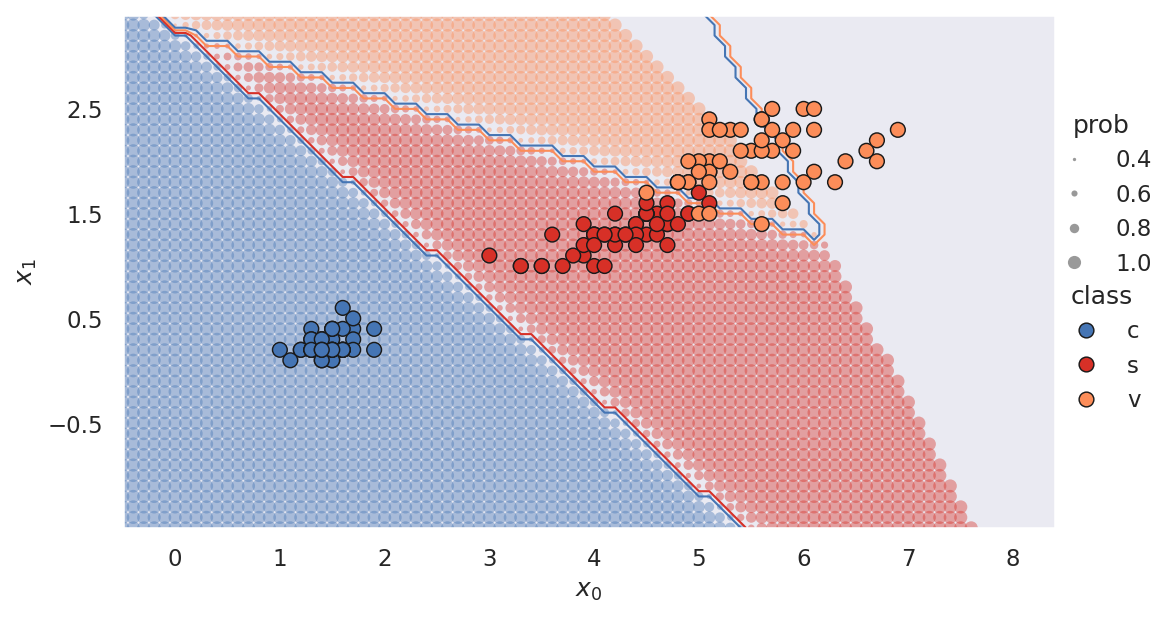

In [10]:
#modify from https://stackoverflow.com/questions/41138706/recreating-decision-boundary-plot-in-python-with-scikit-learn-and-matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
import jax.numpy as jnp

# Assuming your JAXLDA class is already defined

# Load the iris dataset
iris = datasets.load_iris()
x = iris.data[:, [2,3]]  # we only take the first two features
y = iris.target

# Set main parameters
H = 0.1  # mesh stepsize
PROB_DOT_SCALE = 40
PROB_DOT_SCALE_POWER = 3
TRUE_DOT_SIZE = 50
PAD = 1.5

# Create and train the LDA model
model = JAXLDA(smoothing=1.0)
model.fit(jnp.array(x), jnp.array(y))

# Create mesh grid
x0_min, x0_max = np.round(x[:, 0].min()) - PAD, np.round(x[:, 0].max()) + PAD
x1_min, x1_max = np.round(x[:, 1].min()) - PAD, np.round(x[:, 1].max()) + PAD
x0_axis_range = np.arange(x0_min, x0_max, H)
x1_axis_range = np.arange(x1_min, x1_max, H)
xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)

# Predict probabilities for the mesh grid
xx = jnp.array(np.c_[xx0.ravel(), xx1.ravel()])
yy_prob = model.predict_proba(xx)
yy_prob = np.array(yy_prob)  # Convert from JAX array to NumPy array
yy_hat = yy_prob.argmax(axis=1)
yy_size = yy_prob.max(axis=1)

# Create plot
sns.set_theme()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), dpi=150)

# Define colors
redish = '#d73027'
orangeish = '#fc8d59'
blueish = '#4575b4'
colormap = np.array([blueish, redish, orangeish])

# Plot probability dots
ax.scatter(xx[:, 0], xx[:, 1], c=colormap[yy_hat], alpha=0.4,
           s=PROB_DOT_SCALE * yy_size**PROB_DOT_SCALE_POWER, linewidths=0)

# Plot contours
ax.contour(x0_axis_range, x1_axis_range,
           yy_hat.reshape(xx0.shape),
           levels=3, linewidths=1,
           colors=[blueish, redish, orangeish])

# Plot original data points
ax.scatter(x[:, 0], x[:, 1], c=colormap[y], s=TRUE_DOT_SIZE, zorder=3,
           linewidths=0.7, edgecolor='k')

# Set labels
ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")

# Create legends
legend_class = []
for flower_class, color in zip(['c', 's', 'v'], [blueish, redish, orangeish]):
    legend_class.append(Line2D([0], [0], marker='o', label=flower_class, ls='None',
                               markerfacecolor=color, markersize=np.sqrt(TRUE_DOT_SIZE),
                               markeredgecolor='k', markeredgewidth=0.7))

prob_values = [0.4, 0.6, 0.8, 1.0]
legend_prob = []
for prob in prob_values:
    legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                              markerfacecolor='grey',
                              markersize=np.sqrt(PROB_DOT_SCALE * prob**PROB_DOT_SCALE_POWER),
                              markeredgecolor='k', markeredgewidth=0))

legend1 = ax.legend(handles=legend_class, loc='center',
                    bbox_to_anchor=(1.05, 0.35),
                    frameon=False, title='class')

legend2 = ax.legend(handles=legend_prob, loc='center',
                    bbox_to_anchor=(1.05, 0.65),
                    frameon=False, title='prob')

ax.add_artist(legend1)

# Adjust ticks and grid
ax.set_yticks(np.arange(x1_min, x1_max, 1))
ax.grid(False)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_aspect(1)
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_yticks(np.arange(x1_min, x1_max, 1)[1:])

plt.tight_layout()
plt.show()